In [1]:
#importing the libraries
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from collections import Counter

In [2]:
with open('rt_reviews.csv', 'r', encoding='ISO-8859-1', errors='replace') as file:
    df = pd.read_csv(file)

# visualizing the data we have

1. visualizing the rotten and fresh review

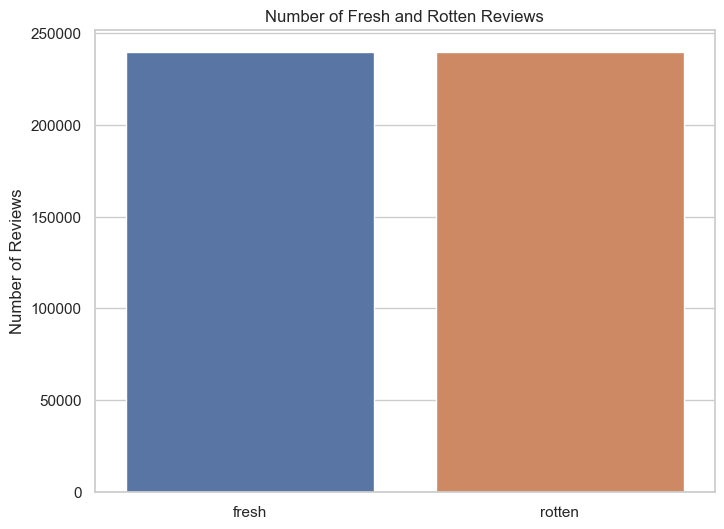

In [3]:
freshness_counts = df['Freshness'].value_counts()
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.barplot(x=freshness_counts.index, y=freshness_counts.values)
plt.ylabel("Number of Reviews")
plt.title("Number of Fresh and Rotten Reviews")
plt.show()

2. I wnat to see the number of words in each review

In [ ]:
import matplotlib.pyplot as plt

# conditional probabilities
p_word_given_fresh = {word: p_word_given_positive.get(word, 0) / (p_word_given_positive.get(word, 0) + p_word_given_negative.get(word, 0)) for word in vocabulary}
p_word_given_rotten = {word: p_word_given_negative.get(word, 0) / (p_word_given_positive.get(word, 0) + p_word_given_negative.get(word, 0)) for word in vocabulary}

# top 10 words
top_fresh_words = sorted(p_word_given_fresh, key=p_word_given_fresh.get, reverse=True)[:10]
top_rotten_words = sorted(p_word_given_rotten, key=p_word_given_rotten.get, reverse=True)[:10]

# Plot bar graphs
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.bar(top_fresh_words, [p_word_given_fresh[word] for word in top_fresh_words], color='green')
plt.title("Top 10 words that predict 'fresh'")
plt.xlabel("Word")
plt.ylabel("Probability")
for i, v in enumerate([p_word_given_fresh[word] for word in top_fresh_words]):
    plt.text(i-0.25, v+0.01, str(round(v, 4)), fontsize=10)
plt.xticks(rotation=45)

plt.subplot(122)
plt.bar(top_rotten_words, [p_word_given_rotten[word] for word in top_rotten_words], color='red')
plt.title("Top 10 words that predict 'rotten'")
plt.xlabel("Word")
plt.ylabel("Probability")
for i, v in enumerate([p_word_given_rotten[word] for word in top_rotten_words]):
    plt.text(i-0.25, v+0.01, str(round(v, 4)), fontsize=10)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


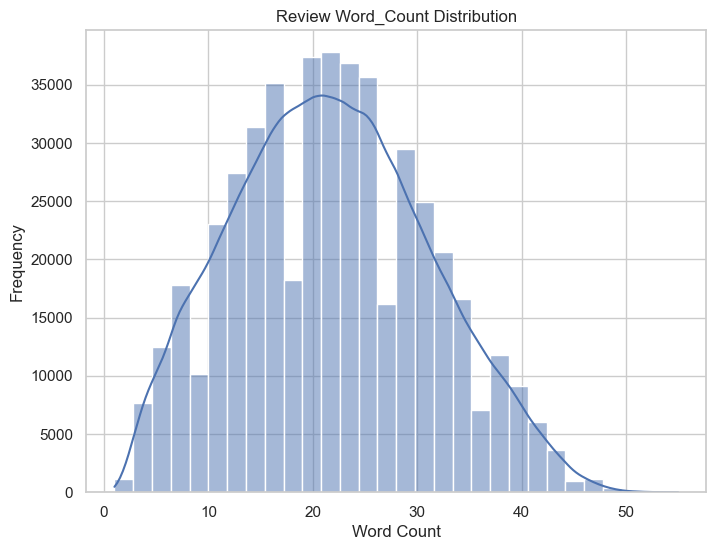

In [4]:
df['word_count'] = df['Review'].apply(lambda x: len(x.split()))

# Plot a histogram of word count distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='word_count', bins=30, kde=True)
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.title("Review Word_Count Distribution")
plt.show()

# preprocessing the data: removing the stop words (my contribution)

In [5]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
df['Review'] = df['Review'].apply(lambda x: ' '.join(word for word in x.split() if word.lower() not in stop_words))
df['word_count'] = df['Review'].apply(lambda x: len(x.split()))

[nltk_data] Downloading package stopwords to C:\Users\Manish
[nltk_data]     Karki\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# visualizing the word count after removing the stop words

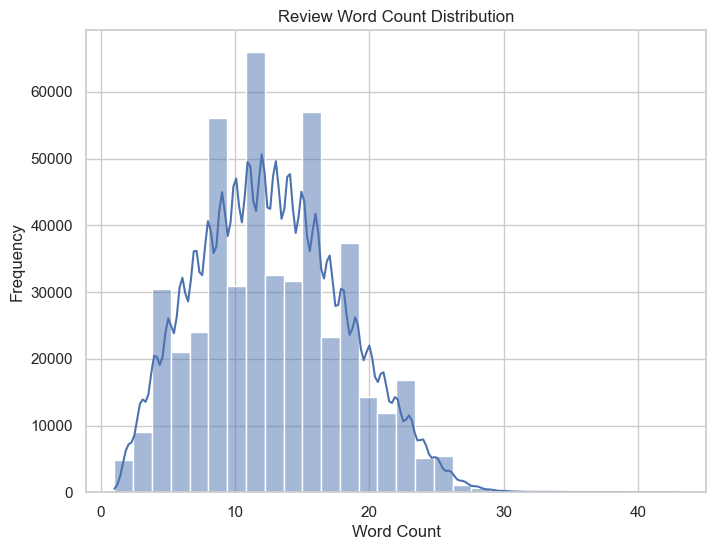

In [6]:

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='word_count', bins=30, kde=True)
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.title("Review Word Count Distribution")
plt.show()

In [36]:
from nltk.stem.snowball import SnowballStemmer

def stem(text):
    # Stem words
    stemmer = SnowballStemmer('english')
    stemmed_words = [stemmer.stem(word) for word in words]

    processed_text = ' '.join(stemmed_words)
    
    return processed_text

In [22]:
df['Review'] = df['Review'].apply(stem)



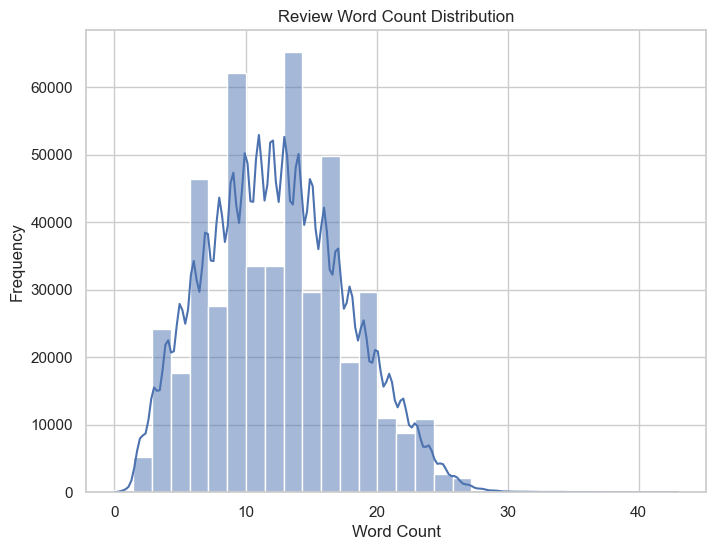

In [23]:

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='word_count', bins=30, kde=True)
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.title("Review Word Count Distribution")
plt.show()

# counting words and reverse indexing

In [24]:
import string
import pandas as pd

# Define a function to remove punctuation and return the count
def remove_punctuation(text):
    num_punct = sum([1 for char in text if char in string.punctuation])
    text = text.translate(str.maketrans("", "", string.punctuation))
    return text, num_punct

# Load the dataset
df = pd.read_csv('rt_reviews.csv', encoding='ISO-8859-1', error_bad_lines=False)
df['Review'], df['num_punct'] = zip(*df['Review'].apply(remove_punctuation))

# Print the modified dataframe
print(df.head())



C:\Users\Manish Karki\AppData\Local\Temp\ipykernel_5172\3903012571.py:11: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('rt_reviews.csv', encoding='ISO-8859-1', error_bad_lines=False)


  Freshness                                             Review  num_punct
0     fresh   Manakamana doesnt answer any questions yet ma...          6
1     fresh   Wilfully offensive and powered by a chestthum...          4
2    rotten   It would be difficult to imagine material mor...          2
3    rotten   Despite the gusto its star brings to the role...          4
4    rotten   If there was a good idea at the core of this ...          5


In [25]:
words = []
for text in df['Review']:
    words.extend(text.split())

# Count the occurrences of each word
word_counts = Counter(words)

# Filter 
min_count = 5
vocabulary = [word for word, count in word_counts.items() if count >= min_count]
reverse_index = {word: i for i, word in enumerate(vocabulary)}

print("Vocabulary size:", len(vocabulary))
print("Reverse index size:", len(reverse_index))

Vocabulary size: 52883
Reverse index size: 52883


# Changing the upper case letters to lower case

In [26]:
    df['Review'] = df['Review'].apply(lambda x: ' '.join(word for word in x.split() if word.lower() not in stop_words))
    df['word_count'] = df['Review'].apply(lambda x: len(x.split()))
  

# suffeling the data set

In [27]:
# Shuffle the dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# dividing the data to training, validation and testing

In [28]:
# Divide the dataset into train, development (validation), and test sets
train_frac = 0.7
dev_frac = 0.2

train_df, remainder_df = train_test_split(df, train_size=train_frac, random_state=42)
dev_df, test_df = train_test_split(remainder_df, train_size=dev_frac/(1-train_frac), random_state=42)

# bigrams

In [29]:
def count_words(docs):
    word_counts = Counter()
    for doc in docs:
        words = doc.lower().split()
        word_counts.update(words)
    return word_counts

In [30]:
def get_vocabulary(word_counts, bigram_counts, min_count):
    vocabulary = [word for word, count in word_counts.items() if count >= min_count]
    bigram_vocabulary = [bigram for bigram, count in bigram_counts.items() if count >= min_count]
    return vocabulary, bigram_vocabulary


In [31]:
def count_bigrams(docs):
    bigram_counts = Counter()
    for doc in docs:
        words = doc.lower().split()
        bigrams = [" ".join(words[i:i+2]) for i in range(len(words) - 1)]
        bigram_counts.update(bigrams)
    return bigram_counts

In [32]:
words = []
bigrams_list = []
for text in df['Review']:
    word_list = text.split()
    words.extend(word_list)
    bigrams_list.extend([" ".join(word_list[i:i+2]) for i in range(len(word_list) - 1)])

# Count the occurrences of each word and bigram
word_counts = Counter(words)
bigram_counts = Counter(bigrams_list)

# Filter out rare words and bigrams
min_count = 5
vocabulary = [word for word, count in word_counts.items() if count >= min_count]
bigram_vocabulary = [bigram for bigram, count in bigram_counts.items() if count >= min_count]


In [33]:
def get_probabilities(df, vocabulary, bigram_vocabulary, alpha=1):
    num_all_docs = len(df)
    all_word_counts = count_words(df['Review'])
    all_bigram_counts = count_bigrams(df['Review'])
    p_word = {word: count / num_all_docs for word, count in all_word_counts.items()}
    p_bigram = {bigram: count / num_all_docs for bigram, count in all_bigram_counts.items()}
    positive_reviews = df[df['Freshness'] == 'fresh']
    num_all_positive_docs = len(positive_reviews)
    positive_word_counts = count_words(positive_reviews['Review'])
    positive_bigram_counts = count_bigrams(positive_reviews['Review'])
    p_word_given_positive = {word: (positive_word_counts.get(word, 0) + alpha) / (num_all_positive_docs + alpha * len(vocabulary)) for word in vocabulary}
    p_bigram_given_positive = {bigram: (positive_bigram_counts.get(bigram, 0)    + alpha) / (num_all_positive_docs + alpha * len(bigram_vocabulary)) for bigram in bigram_vocabulary}
    
    negative_reviews = df[df['Freshness'] == 'rotten']
    num_all_negative_docs = len(negative_reviews)
    negative_word_counts = count_words(negative_reviews['Review'])
    negative_bigram_counts = count_bigrams(negative_reviews['Review'])
    p_word_given_negative = {word: (negative_word_counts.get(word, 0) + alpha) / (num_all_negative_docs + alpha * len(vocabulary)) for word in vocabulary}
    p_bigram_given_negative = {bigram: (negative_bigram_counts.get(bigram, 0) + alpha) / (num_all_negative_docs + alpha * len(bigram_vocabulary)) for bigram in bigram_vocabulary}
    
    p_positive = num_all_positive_docs / num_all_docs
    p_negative = num_all_negative_docs / num_all_docs
    
    return p_word, p_bigram, p_word_given_positive, p_bigram_given_positive, p_word_given_negative, p_bigram_given_negative, p_positive, p_negative


In [34]:
def predict_sentiment(review, p_word_given_positive, p_bigram_given_positive, p_word_given_negative, p_bigram_given_negative, p_positive, p_negative):
    words = review.lower().split()
    bigrams = [" ".join(words[i:i+2]) for i in range(len(words) - 1)]

    log_p_positive = np.log(p_positive) + sum(np.log(p_word_given_positive.get(word, 1e-10)) for word in words) + sum(np.log(p_bigram_given_positive.get(bigram, 1e-10)) for bigram in bigrams)

    log_p_negative = np.log(p_negative) + sum(np.log(p_word_given_negative.get(word, 1e-10)) for word in words) + sum(np.log(p_bigram_given_negative.get(bigram, 1e-10)) for bigram in bigrams)

    return 'fresh' if log_p_positive > log_p_negative else 'rotten'


In [35]:
# Calculate probabilities
p_word, p_bigram, p_word_given_positive, p_bigram_given_positive, p_word_given_negative, p_bigram_given_negative, p_positive, p_negative = get_probabilities(train_df, vocabulary, bigram_vocabulary)

# Make predictions on the development dataset
dev_df['predicted_freshness'] = dev_df['Review'].apply(lambda review: predict_sentiment(review, p_word_given_positive, p_bigram_given_positive, p_word_given_negative, p_bigram_given_negative, p_positive, p_negative))

# Calculate accuracy
accuracy = np.mean(dev_df['predicted_freshness'] == dev_df['Freshness'])
print(f"Accuracy on the development dataset: {accuracy:.4f}")

Accuracy on the development dataset: 0.8269


In [41]:
min_count_values = [1, 5, 10, 20]
alpha_values = [0.1, 0.5, 1.0, 2.0]


best_accuracy = 0
best_min_count = None
best_alpha = None

# Perform a grid search
for min_count in min_count_values:
    for alpha in alpha_values:
        # Get the vocabulary and bigram vocabulary
        vocabulary, bigram_vocabulary = get_vocabulary(word_counts, bigram_counts, min_count)

        # Calculate probabilities
        p_word, p_bigram, p_word_given_positive, p_bigram_given_positive, p_word_given_negative, p_bigram_given_negative, p_positive, p_negative = get_probabilities(train_df, vocabulary, bigram_vocabulary, alpha)
        dev_df['predicted_freshness'] = dev_df['Review'].apply(lambda review: predict_sentiment(review, p_word_given_positive, p_bigram_given_positive, p_word_given_negative, p_bigram_given_negative, p_positive, p_negative))

        # Calculate accuracy
        accuracy = np.mean(dev_df['predicted_freshness'] == dev_df['Freshness'])


        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_min_count = min_count
            best_alpha = alpha

print(f"Best hyperparameters: min_count = {best_min_count}, alpha = {best_alpha}")
print(f"Best accuracy on the development dataset: {best_accuracy:.4f}")


Best hyperparameters: min_count = 1, alpha = 0.5
Best accuracy on the development dataset: 0.8685


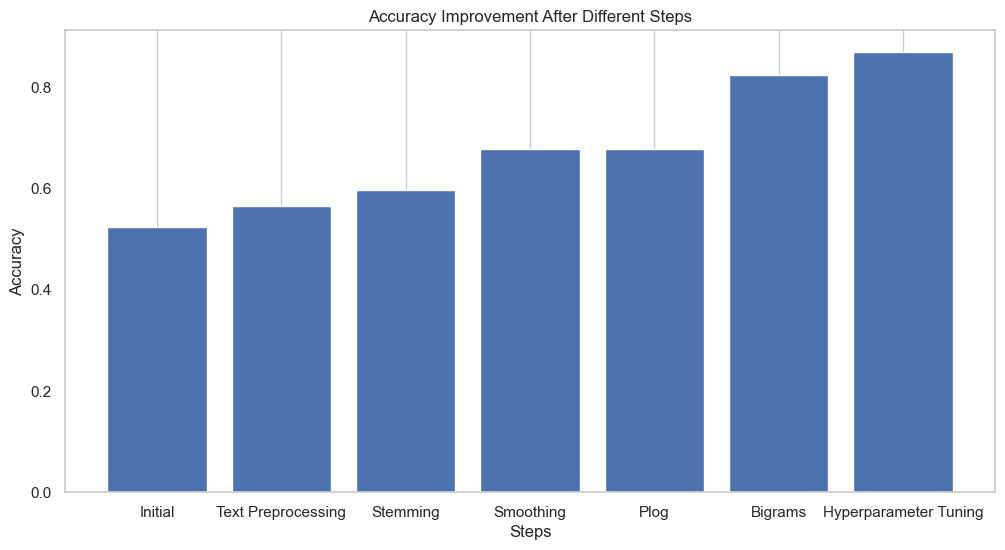

In [38]:

# Data
steps = ['Initial', 'Text Preprocessing', 'Stemming', 'Smoothing', 'Plog', 'Bigrams', 'Hyperparameter Tuning']
accuracy = [0.523, 0.5658, 0.5964, 0.6775, 0.6774, 0.8242, 0.8689]

# Plot the bar graph
plt.figure(figsize=(12, 6))
plt.bar(steps, accuracy, color='b')
plt.xlabel('Steps')
plt.ylabel('Accuracy')
plt.title('Accuracy Improvement After Different Steps')
plt.grid(axis='y')
plt.show()


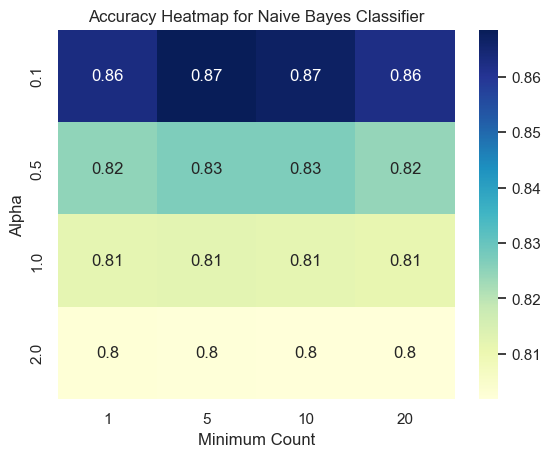

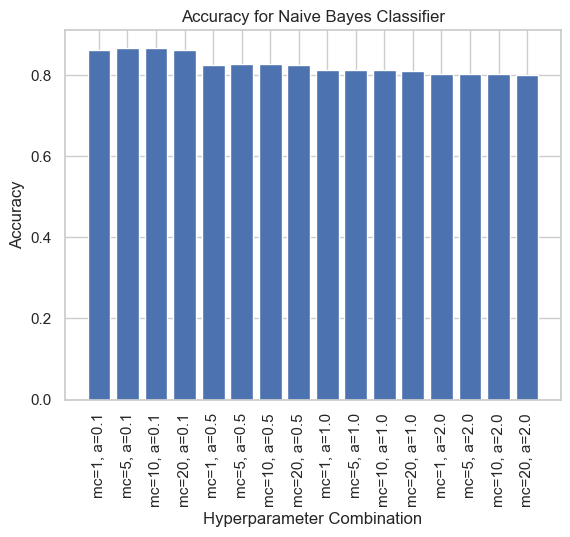

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize lists to store the accuracy values and hyperparameters
accuracy_values = []
min_count_values = [1, 5, 10, 20]
alpha_values = [0.1, 0.5, 1.0, 2.0]


for min_count in min_count_values:
    for alpha in alpha_values:
      
        vocabulary, bigram_vocabulary = get_vocabulary(word_counts, bigram_counts, min_count)
        p_word, p_bigram, p_word_given_fresh, p_bigram_given_fresh, p_word_given_rotten, p_bigram_given_rotten, p_fresh, p_rotten = get_probabilities(train_df, vocabulary, bigram_vocabulary, alpha)
        dev_df['predicted_freshness'] = dev_df['Review'].apply(lambda review: predict_sentiment(review, p_word_given_fresh, p_bigram_given_fresh, p_word_given_rotten, p_bigram_given_rotten, p_fresh, p_rotten))
        accuracy = np.mean(dev_df['predicted_freshness'] == dev_df['Freshness'])
        accuracy_values.append(accuracy)

accuracy_matrix = np.reshape(accuracy_values, (len(alpha_values), len(min_count_values)))


sns.heatmap(accuracy_matrix, annot=True, cmap="YlGnBu", xticklabels=min_count_values, yticklabels=alpha_values)
plt.title('Accuracy Heatmap for Naive Bayes Classifier')
plt.xlabel('Minimum Count')
plt.ylabel('Alpha')
plt.show()
plt.bar(range(len(accuracy_values)), accuracy_values)
plt.title('Accuracy for Naive Bayes Classifier')
plt.xlabel('Hyperparameter Combination')
plt.ylabel('Accuracy')
plt.xticks(range(len(accuracy_values)), [f'mc={mc}, a={a}' for a in alpha_values for mc in min_count_values], rotation=90)
plt.show()


# accuracy on the test data

In [42]:
min_count = 1
alpha = 0.5

# Get the vocabulary and bigram vocabulary with the given min_count
vocabulary, bigram_vocabulary = get_vocabulary(word_counts, bigram_counts, min_count)

# Calculate probabilities with the given alpha
p_word, p_bigram, p_word_given_positive, p_bigram_given_positive, p_word_given_negative, p_bigram_given_negative, p_positive, p_negative = get_probabilities(train_df, vocabulary, bigram_vocabulary, alpha)
test_df['predicted_freshness'] = test_df['Review'].apply(lambda review: predict_sentiment(review, p_word_given_positive, p_bigram_given_positive, p_word_given_negative, p_bigram_given_negative, p_positive, p_negative))
test_accuracy = np.mean(test_df['predicted_freshness'] == test_df['Freshness'])
print(f"Accuracy on the test dataset with min_count={min_count} and alpha={alpha}: {test_accuracy:.4f}")



Accuracy on the test dataset with min_count=1 and alpha=0.5: 0.8671
